# Datos transversales

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
sns.set_style("darkgrid")

In [5]:
data = pd.read_csv('datasets/WDIData.csv')
print('Column names:', data.columns)

Column names: Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', 'Unnamed: 61'],
      dtype='object')


In [6]:
print('No. of rows, columns:', data.shape) #para ver la longitud de mi dataframe

No. of rows, columns: (401016, 62)


In [7]:
nb_countries = data['Country Code'].unique().shape[0] #unique toma las etiquetas unicas, que no se repitan. Cuento los paises
print('Unique number of countries:', nb_countries)

Unique number of countries: 264


Se preparan otros dos DataFrame que obtengan las filas correspondientes a los indicadores Total Central Government Debt (as % of GDP) y Military expenditure (% of GDP) para todos los países.

In [8]:
central_govt_debt = data.loc[data['Indicator Name']=='Central government debt, total (% of GDP)']
military_exp = data.loc[data['Indicator Name']=='Military expenditure (% of GDP)'] #data.loc me permite localizar la variable de interes

Compruebo los dos dataframes anteriores (longitudes):

In [9]:
print('Shape of central_govt_debt:', central_govt_debt.shape)
print('Shape of military_exp:', military_exp.shape)

Shape of central_govt_debt: (264, 62)
Shape of military_exp: (264, 62)


Para trazar los datos univariantes y transversales, necesito la columna 2010. Antes de ejecutar el código para el trazado, compruebo si falta la columna 2010. 

In [10]:
central_govt_debt['2010'].describe()

count     94.000000
mean      53.048479
std       29.790674
min        0.519665
25%       28.357797
50%       49.540245
75%       75.259012
max      161.596402
Name: 2010, dtype: float64

La media de la deuda del Gobierno central del año 2020 (53.04) es mayor que el cuartil 2(49.54), es decir, está un poco sesgada hacia la derecha

In [11]:
military_exp['2010'].describe()

count    192.000000
mean       1.988556
std        1.354856
min        0.000000
25%        1.190287
50%        1.613407
75%        2.624711
max        8.565679
Name: 2010, dtype: float64

La media de la gasto militar del año 2020 (1.98) es mayor que el cuartil 2(1.61), es decir, también está un poco sesgada hacia la derecha

Para hacer que la columna Country Code sea el índice de las filas:

In [12]:
central_govt_debt.index = central_govt_debt['Country Code']
military_exp.index = military_exp['Country Code']

Concateno estos dos dataframes, tomando columnas 2010 no vacías de central_govt_debt y military_exp. 

In [13]:
central_govt_debt_2010 = central_govt_debt['2010'].loc[~pd.isnull(central_govt_debt['2010'])]
military_exp_2010 = military_exp['2010'].loc[~pd.isnull(military_exp['2010'])]
data_to_plot = pd.concat((central_govt_debt_2010, military_exp_2010), axis=1) #axis=1 porque estoy uniendo columnas
data_to_plot.columns = ['central_govt_debt', 'military_exp']

In [14]:
data_to_plot.head()

,central_govt_debt,military_exp
Country Code,,
CEB,47.446156,1.482543
EMU,72.414709,1.618759
ECS,63.137736,1.860343
ECA,22.338687,2.933044
TEC,27.287492,2.785617


In [15]:
data_to_plot.shape

(202, 2)

Ahora grafico lo anterior sólo aquellos países que tienen tanto deuda del gobierno central como gasto militar.

In [16]:
data_to_plot = data_to_plot.loc[(~pd.isnull(data_to_plot.central_govt_debt)) & (~pd.isnull(data_to_plot.military_exp)), :]

In [17]:
data_to_plot.head()

,central_govt_debt,military_exp
Country Code,,
CEB,47.446156,1.482543
EMU,72.414709,1.618759
ECS,63.137736,1.860343
ECA,22.338687,2.933044
TEC,27.287492,2.785617


In [18]:
data_to_plot.shape

(84, 2)

In [19]:
military_exp_np = np.array(data_to_plot.military_exp)

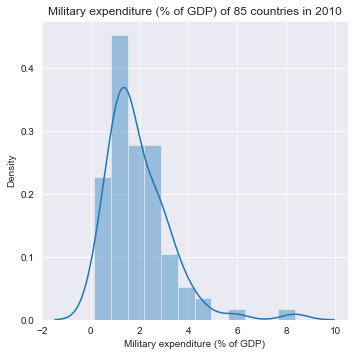

In [20]:
plt.figure(figsize=(5.5, 5.5))
g = sns.distplot(military_exp_np, norm_hist=False)
g.set_title('Military expenditure (% of GDP) of 85 countries in 2010');
plt.xlabel("Military expenditure (% of GDP)");

En el histograma y curva de densidad anterior podemos ver gráficamente que la mayoría de países tienen un gasto militar (expresado como porcentaje del GDP) entre 1 y 2%

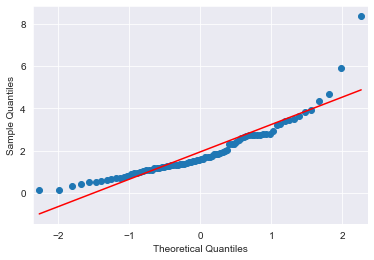

In [21]:
from statsmodels.graphics.gofplots import qqplot

qqplot(military_exp_np, line='s');

Del gráfico anterior se podría inferir que los puntos se hubican alrededor de la línea diagonal.

Prueba de normalidad Sahpiro-Wilks

In [22]:
from scipy.stats import shapiro

stat, p = shapiro(military_exp_np)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
 print('Sample looks Normal (fail to reject H0)')
else:
 print('Sample does not look Normal (reject H0)')

Statistics=0.857, p=0.000
Sample does not look Normal (reject H0)


Prueba de Kurtosis

In [23]:
from scipy.stats import normaltest, kurtosis, skew

stat, p = normaltest(military_exp_np)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')

print('Kurtosis=%.3f'%kurtosis(military_exp_np))
print('Skew=%.3f'%skew(military_exp_np))

Statistics=49.874, p=0.000
Sample does not look Gaussian (reject H0)
Kurtosis=6.122
Skew=1.916


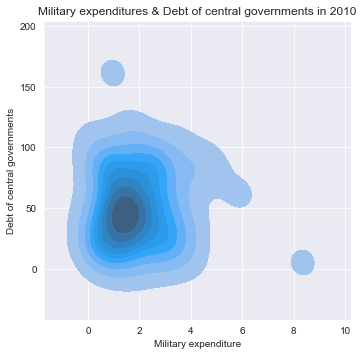

In [24]:
plt.figure(figsize=(5.5, 5.5))
g = sns.kdeplot(data_to_plot, x = "military_exp", y = "central_govt_debt", fill=True)
g.set_title('Military expenditures & Debt of central governments in 2010');
plt.xlabel("Military expenditure");
plt.ylabel("Debt of central governments");

Con el gráfico de distribución bivariado anterior vemos que hay una concentración en la combinación de 2% de gasto militar con 50 de deuda del gobierno central.

# Datos de series temporales

El paso 1 es crear dos nuevas series para representar las series temporales de gastos militares y deuda del gobierno central de los Estados Unidos desde 1960 hasta 2010

In [25]:
central_govt_debt_us = central_govt_debt.loc[central_govt_debt['Country Code']=='USA', :].T
military_exp_us = military_exp.loc[military_exp['Country Code']=='USA', :].T

Los dos objetos creados en el código anterior se fusionan para formar un único DataFrame y se cortan para contener los datos de los años 2001 a 2010:

In [26]:
data_us = pd.concat((military_exp_us, central_govt_debt_us), axis=1)
index0 = np.where(data_us.index=='1960')[0][0]
index1 = np.where(data_us.index=='2010')[0][0]
data_us = data_us.iloc[index0:index1+1,:]
data_us.columns = ['Federal Military Expenditure', 'Debt of Federal Government']
data_us.head()

,Federal Military Expenditure,Debt of Federal Government
1960,8.35266,NaN
1961,8.487129,NaN
1962,8.656586,NaN
1963,8.189007,NaN
1964,7.467629,NaN


Los métodos isna() o isnull() sirven para detectar los valores que faltan en los datos. Para obtener el total de valores perdidos en cada columna se utiliza sum() o se puede tomar la media con mean().

In [27]:
data_us.isna().sum()

Federal Military Expenditure     0
Debt of Federal Government      29
dtype: int64

In [28]:
data_us.isnull().mean()*100

Federal Military Expenditure     0.000000
Debt of Federal Government      56.862745
dtype: float64

In [29]:
data_us['backward_fill'] = data_us['Debt of Federal Government'].bfill()
data_us.head()

,Federal Military Expenditure,Debt of Federal Government,backward_fill
1960,8.35266,NaN,39.016963
1961,8.487129,NaN,39.016963
1962,8.656586,NaN,39.016963
1963,8.189007,NaN,39.016963
1964,7.467629,NaN,39.016963


In [30]:
data_us['mean_fill'] = data_us['Debt of Federal Government'].mean()
data_us.head()

,Federal Military Expenditure,Debt of Federal Government,backward_fill,mean_fill
1960,8.35266,NaN,39.016963,51.155537
1961,8.487129,NaN,39.016963,51.155537
1962,8.656586,NaN,39.016963,51.155537
1963,8.189007,NaN,39.016963,51.155537
1964,7.467629,NaN,39.016963,51.155537


In [31]:
data_us['median_fill'] = data_us['Debt of Federal Government'].median()
data_us.head()

,Federal Military Expenditure,Debt of Federal Government,backward_fill,mean_fill,median_fill
1960,8.35266,NaN,39.016963,51.155537,47.659404
1961,8.487129,NaN,39.016963,51.155537,47.659404
1962,8.656586,NaN,39.016963,51.155537,47.659404
1963,8.189007,NaN,39.016963,51.155537,47.659404
1964,7.467629,NaN,39.016963,51.155537,47.659404


In [32]:
data_us['quadratic_fill'] = data_us['Debt of Federal Government'].interpolate(option='quadratic')
data_us.head()

,Federal Military Expenditure,Debt of Federal Government,backward_fill,mean_fill,median_fill,quadratic_fill
1960,8.35266,NaN,39.016963,51.155537,47.659404,NaN
1961,8.487129,NaN,39.016963,51.155537,47.659404,NaN
1962,8.656586,NaN,39.016963,51.155537,47.659404,NaN
1963,8.189007,NaN,39.016963,51.155537,47.659404,NaN
1964,7.467629,NaN,39.016963,51.155537,47.659404,NaN


quadratic_fill es un método de imputación que mantiene los valores NaN. Esta técina ofrece las siguientes versiones de imputación: 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'spline', 'barycentric', 'polynomial'. Dado que no se dispone solamente de datos sobre la deuda federal de varios años a partir de 1960, y se necesitan las dos dimensiones, otra opción es eliminar las filas con valores del Dataframe data_us antes de trazar la serie temporal

In [33]:
data_us.dropna(inplace=True)
print('Shape of data_us:', data_us.shape)

Shape of data_us: (22, 6)


In [34]:
data_us.head(10)

,Federal Military Expenditure,Debt of Federal Government,backward_fill,mean_fill,median_fill,quadratic_fill
1989,5.374717,39.016963,39.016963,51.155537,47.659404,39.016963
1990,5.120252,40.821367,40.821367,51.155537,47.659404,40.821367
1991,4.539845,43.948026,43.948026,51.155537,47.659404,43.948026
1992,4.666265,45.916542,45.916542,51.155537,47.659404,45.916542
1993,4.326925,48.104749,48.104749,51.155537,47.659404,48.104749
1994,3.941287,47.21406,47.214060,51.155537,47.659404,47.21406
1995,3.638489,47.059783,47.059783,51.155537,47.659404,47.059783
1996,3.350744,46.585511,46.585511,51.155537,47.659404,46.585511
1997,3.209903,43.958801,43.958801,51.155537,47.659404,43.958801
1998,3.017636,41.009914,41.009914,51.155537,47.659404,41.009914


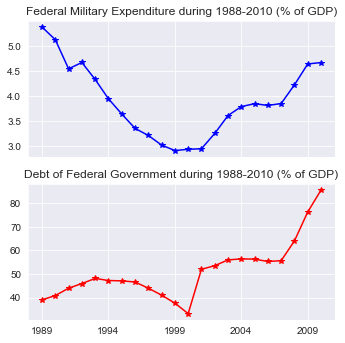

In [35]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
axarr[0].set_title('Federal Military Expenditure during 1988-2010 (% of GDP)')
data_us['Federal Military Expenditure'].plot(linestyle='-', marker='*', color='b', ax=axarr[0])
axarr[1].set_title('Debt of Federal Government during 1988-2010 (% of GDP)')
data_us['Debt of Federal Government'].plot(linestyle='-', marker='*', color='r', ax=axarr[1]);

Respecto a la figura anterior, vemos que el tiempo si ha influido en el gasto militar federal y la deuda del gobierno federal. De 1989 al 2000 el gasto federal militar (% GDP) mostró una tendencia decreciente, y a partir de ese año, aumentó. Mientras que la deuda del gobierno federal mostró una tendencia decreciente desde 1993 hasta el 2000, y a partir de este año muestra una tendencia creciente.

# Datos de panel 
Datos donde existen varias variables que se comportan como series de tiempo

Ahora se consideran cuatro países (China, USA, India y Reino Unido) durante el mismo periodo de 1960-2010. Los datos resultantes serán un conjunto de datos de panel.

In [36]:
chn = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)') & \
               (data['Country Code']=='CHN'), :].drop(data.columns[range(3)], axis=1) #China
chn = pd.Series(data=chn.values[0], index=chn.columns)
chn.dropna(inplace=True)
chn.head()

Indicator Code    MS.MIL.XPND.GD.ZS
1989                       2.499185
1990                       2.555996
1991                       2.407892
1992                       2.518629
dtype: object

El gasto militar se expresa como porcentaje del GDP.

In [37]:
usa = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)') & \
               (data['Country Code']=='USA'), :].drop(data.columns[range(3)], axis=1) #USA
usa = pd.Series(data=usa.values[0], index=usa.columns)
usa.dropna(inplace=True)
usa.head()

Indicator Code    MS.MIL.XPND.GD.ZS
1960                        8.35266
1961                       8.487129
1962                       8.656586
1963                       8.189007
dtype: object

In [38]:
ind = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)') & \
               (data['Country Code']=='IND'), :].drop(data.columns[range(3)], axis=1) #India
ind = pd.Series(data=ind.values[0], index=ind.columns)
ind.dropna(inplace=True)
ind.head()

Indicator Code    MS.MIL.XPND.GD.ZS
1960                       1.866015
1961                       1.933365
1962                       2.561202
1963                       3.758057
dtype: object

In [39]:
gbr = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)') & \
               (data['Country Code']=='GBR'), :].drop(data.columns[range(3)], axis=1) #United Kingdom
gbr = pd.Series(data=gbr.values[0], index=gbr.columns)
gbr.dropna(inplace=True)
gbr.head()

Indicator Code    MS.MIL.XPND.GD.ZS
1960                       6.343041
1961                       6.190022
1962                       6.210394
1963                       6.082126
dtype: object

In [40]:
n_years = chn.shape[0]

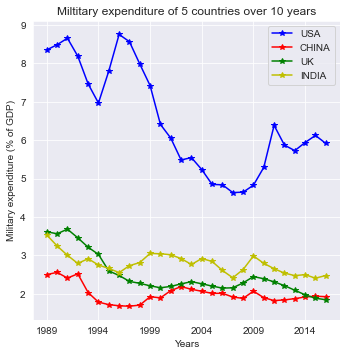

In [41]:
plt.figure(figsize=(5.5, 5.5))
usa[1:n_years].plot(linestyle='-', marker='*', color='b')
chn[1:n_years].plot(linestyle='-', marker='*', color='r')
gbr[n_years+1:2*n_years].plot(linestyle='-', marker='*', color='g')
ind[n_years+1:2*n_years].plot(linestyle='-', marker='*', color='y')
plt.legend(['USA','CHINA','UK','INDIA'], loc=1)
plt.title('Miltitary expenditure of 5 countries over 10 years')
plt.ylabel('Military expenditure (% of GDP)')
plt.xlabel('Years');

Dentro de los paises analizados, USA es el pais con mayor gasto militar (como % del GDP), mientras China es el pais con menor gasto. El gasto militar más alto de USA en el período de análisis fue el de 1996. El de Reino Unido fue en 1991. El de India fue en 1989, y el de China fue en 1990. Lo 4 países finalizan el período 1989-2016 con menos Gasto militar que con el que iniciaron.

# Estructuras internas de las series temporales
1) Tendencia general

In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [43]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
data = pd.read_excel('datasets/Monthly_CO2_Concentrations.xlsx', converters={'Year': np.int32, 'Month': np.int32})

In [45]:
data.head()

,CO2,Year,Month
0,333.13,1974,5
1,332.09,1974,6
2,331.10,1974,7
3,329.14,1974,8
4,327.36,1974,9


Se creó un índice de filas del DataFrame utilizando las columnas Year y Month

In [46]:
data.index = data['Year'].astype(str) + '-' + data['Month'].astype(str).map(lambda x: '0'+x if len(x) == 1 else x)
data.head()

,CO2,Year,Month
1974-05,333.13,1974,5
1974-06,332.09,1974,6
1974-07,331.10,1974,7
1974-08,329.14,1974,8
1974-09,327.36,1974,9


Quito los valores nulos

In [47]:
data = data.loc[(~pd.isnull(data['CO2'])) & \
                (~pd.isnull(data['Year']))& \
                (~pd.isnull(data['Month']))]

In [48]:
data.sort_values(['Year', 'Month'], inplace=True) #inplace true es para que no bote el resultado de la operación

Una forma de comprobar la presencia de una tendencia general es trazar la serie temporal, que muestre las concentraciones de CO2 en el aire medidas durante 1974 hasta 1987.

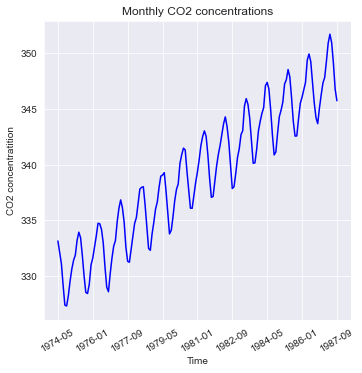

In [49]:
plt.figure(figsize=(5.5, 5.5))
data['CO2'].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30);

La grafica nos muestra que tenemos una serie de tiempo con tendencia general (hay un patron u onda que se va repitiendo en el tiempo), o al menos en el largo plazo. Si probamos lo mismo pero en el corto plazo (sólo considerando de 1979 a 1981), la tendencia ya no es tan evidente.

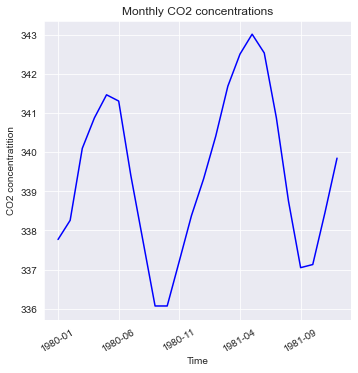

In [50]:
plt.figure(figsize=(5.5, 5.5))
data['CO2'].loc[(data['Year']==1980) | (data['Year']==1981)].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30);

Con un periodo de tiempo mas corto, puede que no se vea la tendencia temporal. En este caso, la tendencia ascendente de las concentraciones de CO2 entre 1974 y 1987 puede deberse al aumento gradual de los automóviles y la industrialización. A continuación, se ajusta la línea de tendencia.

In [51]:
pip install -U scikit-learn #esto lo instalo para ajustar un modelo lineal al índice temporal

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#esto'

[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
pip install --upgrade pip

  Using cached pip-23.0.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.3
    Uninstalling pip-22.3:
      Successfully uninstalled pip-22.3
  Rolling back uninstall of pip
  Moving to c:\users\caro_\appdata\roaming\python\python39\scripts\pip.exe
   from C:\Users\caro_\AppData\Local\Temp\pip-uninstall-vgijjgmb\pip.exe
  Moving to c:\users\caro_\appdata\roaming\python\python39\scripts\pip3.10.exe
   from C:\Users\caro_\AppData\Local\Temp\pip-uninstall-vgijjgmb\pip3.10.exe
  Moving to c:\users\caro_\appdata\roaming\python\python39\scripts\pip3.9.exe
   from C:\Users\caro_\AppData\Local\Temp\pip-uninstall-vgijjgmb\pip3.9.exe
  Moving to c:\users\caro_\appdata\roaming\python\python39\scripts\pip3.exe
   from C:\Users\caro_\AppData\Local\Temp\pip-uninstall-vgijjgmb\pip3.exe
  Moving to c:\users\caro_\appdata\roaming\python\python39\site-packages\pip-22.3.dist-info\
   from C:\Users\caro_\AppData\Roaming\Python\Python39\site-packages\~ip-22.3.

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\caro_\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\base_command.py", line 160, in exc_logging_wrapper
    status = run_func(*args)
  File "C:\Users\caro_\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\req_command.py", line 247, in wrapper
    return func(self, options, args)
  File "C:\Users\caro_\AppData\Roaming\Python\Python39\site-packages\pip\_internal\commands\install.py", line 494, in run
    installed = install_given_reqs(
  File "C:\Users\caro_\AppData\Roaming\Python\Python39\site-packages\pip\_internal\req\__init__.py", line 73, in install_given_reqs
    requirement.install(
  File "C:\Users\caro_\AppData\Roaming\Python\Python39\site-packages\pip\_internal\req\req_install.py", line 792, in install
    install_wheel(
  File "C:\Users\caro_\AppData\Roaming\Python\Python39\site-packages\pip\_internal\operations\install\wheel.py", line 729, in install_wheel
    _install_wheel(

In [53]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [54]:
trend_model = LinearRegression(fit_intercept=True)
trend_model.fit(np.arange(data.shape[0]).reshape((-1,1)), data['CO2']) #reshape es para ponerlo como columna

LinearRegression()

In [55]:
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0], trend_model.intercept_))

Trend model coefficient=0.1209930124223602 and intercept=329.45310559006214


El residuo se calcula con los datos ajustados del conjunto de entrenamiento. Datos originales - datos ajustados. Los residuos ya no tendrian tendencia

In [56]:
residuals = np.array(data['CO2']) - trend_model.predict(np.arange(data.shape[0]).reshape((-1,1)))

El residual obtenido a partir del modelo de línea de tendencia, presenta un comportamiento estacional

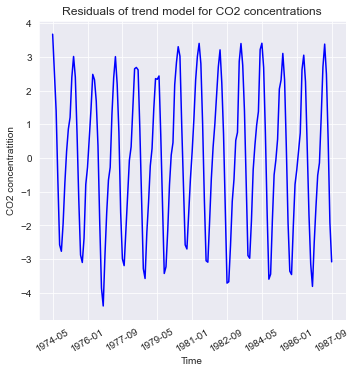

In [57]:
plt.figure(figsize=(5.5, 5.5))
pd.Series(data=residuals, index=data.index).plot(color='b')
plt.title('Residuals of trend model for CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30);

# Estacionalidad
Variaciones repetitivas y periodicas en la serie temporal

Grafico de subserie estacional: Para visualizar estacionalidad en los residuos, creo medias y desviaciones estándar trimestrales. Primero añado los residuos y las etiquetas trimestrales al DataFrame de concentraciones de CO2:

In [58]:
data['Residuals'] = residuals
month_quarter_map = {1: 'Q1', 2: 'Q1', 3: 'Q1',
                     4: 'Q2', 5: 'Q2', 6: 'Q2',
                     7: 'Q3', 8: 'Q3', 9: 'Q3',
                     10: 'Q4', 11: 'Q4', 12: 'Q4'}
data['Quarter'] = data['Month'].map(lambda m: month_quarter_map.get(m))

Luego, calculo la media estacional y las desviaciones típicas agrupando los datos por Year y Quarter. Esto crea el nuevo DataFrame como seasonal_sub_series_data, que tiene la media trimestral y las desviaciones estándar a lo largo de los años. Estas columnas se renombran como sigue:

In [59]:
seasonal_sub_series_data = data.groupby(by=['Year', 'Quarter'])['Residuals'].aggregate([np.mean, np.std])
seasonal_sub_series_data.columns = ['Quarterly Mean', 'Quarterly Standard Deviation'] #nombro las columnas

Creo índices de filas de seasonal_sub_series_data utilizando Year & Quarter

In [60]:
seasonal_sub_series_data.reset_index(inplace=True)
seasonal_sub_series_data.index = seasonal_sub_series_data['Year'].astype(str) + '-' + seasonal_sub_series_data['Quarter']
seasonal_sub_series_data.head()

,Year,Quarter,Quarterly Mean,Quarterly Standard Deviation
1974-Q2,1974,Q2,3.096398,0.820946
1974-Q3,1974,Q3,-0.616085,1.991671
1974-Q4,1974,Q4,-1.822397,1.014952
1975-Q1,1975,Q1,0.754624,0.511890
1975-Q2,1975,Q2,2.604978,0.355093


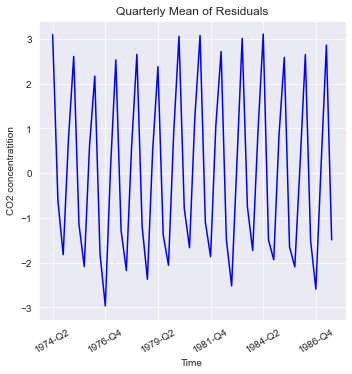

In [61]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Mean'].plot(color='b')
plt.title('Quarterly Mean of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30); #grafico de la media por trimestre

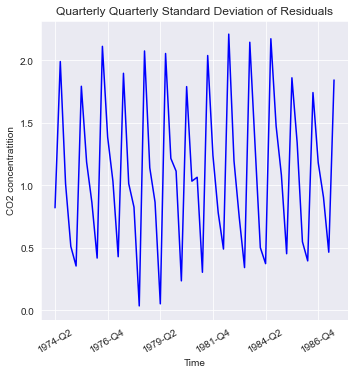

In [62]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Standard Deviation'].plot(color='b')
plt.title('Quarterly Quarterly Standard Deviation of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30);

Tanto el gráfico de la media trimestral, como la desviación estandár trimestral de los residuos comprueba el comportamiento estacional de los residuos.

Gráficos de cajas múltiples: muestra tanto la tendencia central como la dispersión de los datos estacionales en un lote de unidades temporales. La separación entre dos gráficos de caja adyacentes revela las variaciones dentro de la temporada

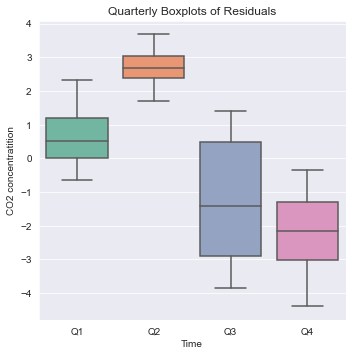

In [66]:
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=data, y='Residuals', x='Quarter', order=[
                 'Q1', 'Q2', 'Q3', 'Q4'],palette='Set2')
g.set_title('Quarterly Boxplots of Residuals')
g.set_xlabel('Time')
g.set_ylabel('CO2 concentratition');

En la grafica de cajas de los residuales anterior se observan variaciones en las temporadas. En el Q2 se equivocó mas (por ser mas ancho). Y el Q1 fue donde se equivocó menos. El segundo trimestre es el que mas esta más por encima de la linea de tendencia

Cambios cíclicos: son movimientos que se observan cada pocas unidades de tiempo, pero ocurren con menos frecuencia que las fluctuaciones estacionales. A diferencia de la estacionalidad, los cambios cíclicos pueden no tener un periodo fijo de variaciones.

La siguiente figura muestra los cambios cíclicos de la Inflación del índice de precios al consumo (IPC) de la India y Estados Unidos, en el periodo 1960-2016. Ambos países muestran patrones cíclicos en la inflación del IPC, que es aproximadamente durante un período de 2-2.5 años. 

In [67]:
inflation = pd.read_excel('datasets/inflation-consumer-prices-annual.xlsx', parse_dates=['Year'])

In [68]:
inflation.head() #Visualizamos los datos

,Year,India,United States
0,1960-01-01,1.783265,1.509929
1,1961-01-01,1.752022,1.075182
2,1962-01-01,3.576159,1.116071
3,1963-01-01,2.941176,1.214128
4,1964-01-01,13.354037,1.308615


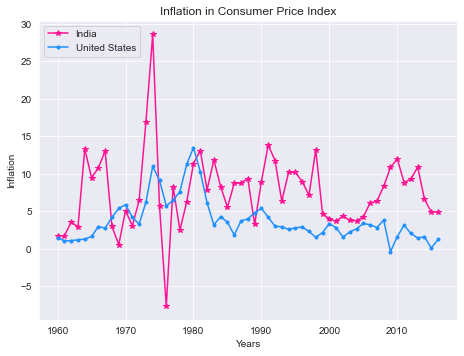

In [71]:
plt.figure(figsize=(7.5, 5.5))
plt.plot(range(1960,2017), inflation['India'], linestyle='-', marker='*', color='deeppink')
plt.plot(range(1960,2017), inflation['United States'], linestyle='-', marker='.', color='dodgerblue')
plt.legend(['India','United States'], loc=2)
plt.title('Inflation in Consumer Price Index')
plt.ylabel('Inflation')
plt.xlabel('Years');

De la gráfica anterior se infifere que la inflación del IPC de la India y de Estados Unidos presenta mayores variaciones antes de 1990 que después de 1990 (aunque la de USA fluctúa mucho menos). La inflación más alta del período para India fue en 1974, mientras ue la más baja fue dos años después en 1976. En el 2009, USA tuvo su inflación más baja, mientras que en 1980 registró la inflación más alta. 

# Modelos de análisis de series temporales

## Modelos de media cero

Los modelos de media cero tienen una media y una varianza constantes y no muestran tendencias predecibles ni estacionalidad. La siguiente figura muestra una serie de ruido aleatorio con media cero y distribución normal de varianza unitaria.

In [72]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [73]:
zero_mean_series = np.random.normal(loc=0.0, scale=1., size=100)

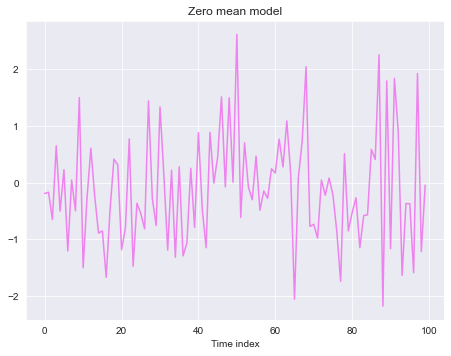

In [76]:
plt.figure(figsize=(7.5, 5.5))
g = sns.lineplot(zero_mean_series, color='violet')
g.set_title('Zero mean model')
g.set_xlabel('Time index');

La gráfica anterior muestra variaciones irregulares en la serie temporal de una variable continua.

## Recorrido aleatorio

Un paseo aleatorio viene dado como una suma de $n$ iids, que tiene media cero y varianza constante. A partir de esta definición, la realización de un paseo aleatorio en el índice de tiempo viene dada por la suma $S=y_1 + y_2 +...+y_n$. El paseo aleatorio puede generarse tomando la suma acumulada del modelo de media cero, como sigue:

In [77]:
random_walk = np.cumsum(zero_mean_series)

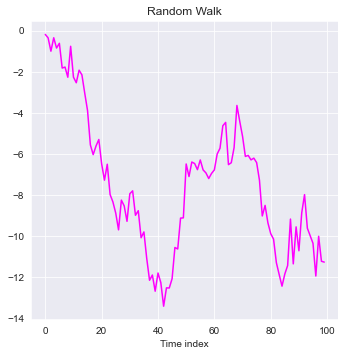

In [86]:
plt.figure(figsize=(5.5, 5.5))
g = sns.lineplot(random_walk, color='magenta')
g.set_title('Random Walk')
g.set_xlabel('Time index');

En la gráfica anterior no se observa tendencia o ciclos. De hecho, en el ámbito financiero, la teoría del paseo alaeatorio asume que el mercado de valores se mueve de una manera impredecible, es decir, el precio futuro de cada acción es independiente de su propio movimiento histórico y del precio de otros valores.

## Autocorrelación y autocorrelación parcial

Una serie temporal estacionaria (o débilmente estacionaria), tiene una media constante $E(y_t)$ y una correlación que solo depende del desfase entre dos pasos temporales, pero independiente del valor del paso temporal, esto es, su distribución de probabilidad es completamente independiente del tiempo. Este tipo de covarianza se denomina autocovarianza o autocorrelación, cuando se normaliza en el intervalo de -1 a 1. La autocorrelación es una medida de la dependencia lineal entre las variables $y_t$ y $y_{t+h}$.

Una autocorrelación positiva indica que los valores presentes y futuros de la serie temporal se mueven en la misma dirección, mientras que los valores negativos significan que los valores presentes y futuros se mueven en sentido contrario. Si la autocorrelación es cercana a cero, las dependencias temporales dentro de la serie pueden ser difíciles de encontrar. 

La presencia de autocorrelación puede identificarse trazando los valores observados de la función de autocorrelación (ACF) de una serie temporal determinada. Se ilustrará a continuación cómo el trazado de los valores observados de la ACF puede ayudar a detectar la presencia de autocorrelación. Para ello, se trazará primero el valor diario del Dow Jones Industrial Average (DJIA) observado desde enero de 2016 a diciembre de 2016. Este es uno de los índices bursátiles creados por Charles Henry Dow.

In [87]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [88]:
djia_df = pd.read_excel('datasets/DJIA_Jan2016_Dec2016.xlsx')

In [89]:
djia_df.index = djia_df['Date']
djia_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2016-01-04,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
2016-01-05,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2016-01-06,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
2016-01-07,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
2016-01-08,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


Se tienen variables como la fecha, valor de apertura, valor de cierre, valor más alto, valor más bajo, volumen

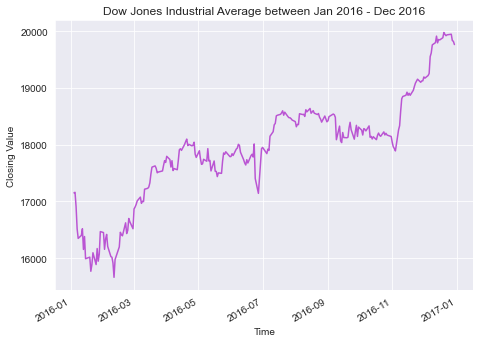

In [92]:
plt.figure(figsize=(7.5, 5.5))
djia_df['Close'].plot(color='mediumorchid')
plt.title('Dow Jones Industrial Average between Jan 2016 - Dec 2016')
plt.xlabel('Time')
plt.ylabel('Closing Value');

A primera vista, pareciera que cuando el DJIA empieza a subir, continúa haciéndolo durante algún tiempo, y cuando baja, cae en picada durante un lapso de tiempo. Para comprobar esto, se estima la ACF calculando la autocorrelación para diferentes valores del retardo $h$, que en este caso varía de 0 a 100. 

In [91]:
lag = range(0,31)
djia_acf = []
for l in lag:
    djia_acf.append(djia_df['Close'].autocorr(l))

El código anterior itera sobre una lista de 100 valores del lag empezando de 0 a 30. Un desfase de 0 indica autocorrelación de una observación consigo misma (autocorrelación) y por lo tanto, se espera que sea 1.0

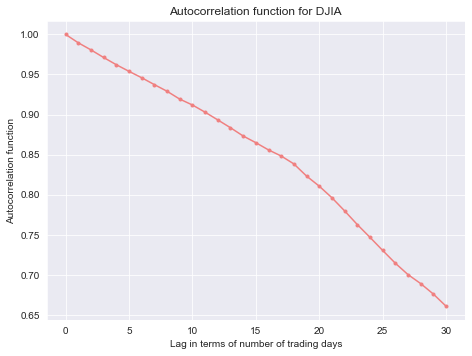

In [95]:
plt.figure(figsize=(7.5, 5.5))
plt.plot(djia_acf, marker='.', color='lightcoral')
plt.title('Autocorrelation function for DJIA')
plt.xlabel('Lag in terms of number of trading days')
plt.ylabel('Autocorrelation function');

Del gráfico ACF, se sospecha que la autocorrelación en DJIA Close disminuye linealmente con el retardo, con un cambio en la tasa de caída alrededor de los 18 días. Con un desfase de 30 días, la ACF es de 0.66 aproximadamente. También se observa que la autocorrelación, en el caso de los valores de cierre del DJIA, depende del desfase temporal entre las observaciones.

Otra manera de calcular la autocorrelación es con la función plot_acf, la cual traza los intervalos de confianza del 95%; la autocorrelación fuera de estos intervalos de confianza es una correlación estadísticamente significativa, mientras que las que están dentro de los intervalos de confianza se deben a ruido aleatorio.

<Figure size 612x540 with 0 Axes>

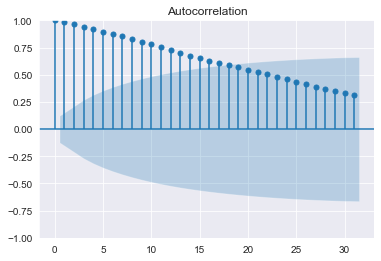

In [98]:
plt.figure(figsize=(8.5, 7.5))
plot_acf(djia_df['Close'], lags=31);

El área sombrueda son los intervalos de confianza, las líneas cuyo círculo esté por fuera de este, indican una autocorrelación significativa: es decir, hasta el rezago h=16.

Los modelos autorregresivos (AR) captan la dependencia lineal como una regresión lineal entre $y_{t+h}$ y $y_t$. Sin embargo, las series temporales tienden a llevar información y estructuras de dependencia por etapas, por lo que la autocorrelación en el retardo $h$ también se ve influida por las variables intermedias $y_t ,y_{t+1},...y_{t+h-1}$´. Es decir, la autocorrelación no es la medida correcta de la correlación mutua entre $y_t$ y $y_{t+h}$ cuando hay variables intermedias.

La autocorrelación parcial resuelve este problema midiendo la correlación entre $y_t$ y $y_{t+h}$ cuando se ha eliminado la influencia de las variables intermedias. Por lo tanto, la autocorrelación parcial en el análisis de series temporales define la correlación entre $y_t$ y $y_{t+h}$ que no tiene en cuenta los retardos $t+1,...,t+h-1$. La autocorrelación parcial permite identificar el orden $h$ de un modelo $AR(h)$.

<Figure size 396x396 with 0 Axes>

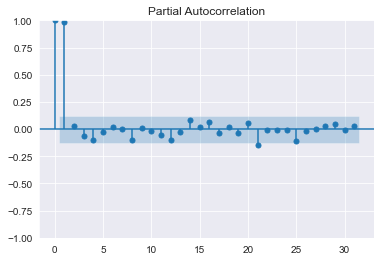

In [101]:
plt.figure(figsize=(5.5, 5.5))
plot_pacf(djia_df['Close'], lags=31); #valores de cierre del DJIA

A partir del gráfico anterior, se concluye que sólo en el retardo 1 la autocorrelación parcial es estadísticamente significativa, mientras que para el resto de los rezagos está dentro de los intervalos de confianza del 95%. La primera autocorrelación parcial (retardo 0) es siempre 1.0. Es decir, para los valores de cierre del DJIA resultado adecuado usar $AR(1)$.